<a href="https://colab.research.google.com/github/matthewhawksby/MountainMadness/blob/main/Localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mne
import os
import sys
import pandas as pd
import numpy as np
import mne
import matplotlib.pyplot as plt
import glob
from pathlib import Path


from google.colab import drive
drive.mount('/content/drive')

import helper
DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/MNE/bci-main/src/data/"
TSV_PATH = "/content/drive/MyDrive/Colab Notebooks/MNE/bci-main/stimuli/demo/*.tsv"
SRC_DIR = "/content/drive/MyDrive/Colab Notebooks/MNE/bci-main/src"
sys.path.append(SRC_DIR)

import helper
import importlib
importlib.reload(helper)

subjects_dir = Path("/content/drive/MyDrive/fsaverage")
mne.datasets.fetch_fsaverage(subjects_dir=subjects_dir, verbose=True)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 38.0 MB/s eta 0:00:00
Mounted at /content/drive
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
0 files missing from root.txt in /content/drive/MyDrive/fsaverage
0 files missing from bem.txt in /content/drive/MyDrive/fsaverage/fsaverage


PosixPath('/content/drive/MyDrive/fsaverage/fsaverage')

In [2]:


def load_all_csvs(csv_dir="/content/drive/MyDrive/Colab Notebooks/MNE/bci-main/src/data"):
    print(f"📁 Searching in directory: {csv_dir}")

    csv_files = sorted(glob.glob(os.path.join(csv_dir, "M0*_main_*.csv")))
    print(f"🔍 Found {len(csv_files)} CSV files matching 'M0*_main_*.csv'")

    if not csv_files:
        print("⚠️ No files found. Double-check the directory and filename pattern.")

    # Group files by participant
    participant_files = {}
    for path in csv_files:
        filename = os.path.basename(path)
        participant = filename.split("_")[0]
        if participant not in participant_files:
            participant_files[participant] = []
        participant_files[participant].append(path)

    # Only keep the most recent file per participant
    df_map = {}
    for participant, paths in participant_files.items():
        latest_path = sorted(paths)[-1]  # last file alphabetically is the newest
        print(f"📄 Using latest file for {participant}: {os.path.basename(latest_path)}")
        try:
            df = pd.read_csv(latest_path)
            print(f"   ✅ Loaded with shape: {df.shape}")
            df_map[participant] = df
        except Exception as e:
            print(f"   ❌ Failed to read {latest_path}: {e}")

    print("✅ Done loading most recent CSV for each participant.\n")
    return df_map

csv_data = load_all_csvs()

📁 Searching in directory: /content/drive/MyDrive/Colab Notebooks/MNE/bci-main/src/data
🔍 Found 6 CSV files matching 'M0*_main_*.csv'
📄 Using latest file for M001: M001_main_2025-04-04_14h50.48.761.csv
   ✅ Loaded with shape: (658, 65)
📄 Using latest file for M002: M002_main_2025-04-14_13h48.34.684.csv
   ✅ Loaded with shape: (658, 61)
📄 Using latest file for M003: M003_main_2025-04-14_15h02.26.451.csv
   ✅ Loaded with shape: (657, 61)
✅ Done loading most recent CSV for each participant.



In [3]:
### Why does M001 have more columns?
# Print shape of each participant's DataFrame
for participant, df in csv_data.items():
    print(f"\n📄 Participant: {participant}")
    print(f"   🔢 Shape: {df.shape}")
    print(f"   📋 Columns: {list(df.columns)}")

# Compare column names across all participant DataFrames
def compare_column_names(csv_data):
    print("\n🧮 Comparing column names across participants...")

    participant_cols = {p: set(df.columns) for p, df in csv_data.items()}

    # Print column counts and names
    for p, cols in participant_cols.items():
        print(f"\n👤 {p}: {len(cols)} columns")
        print(f"   ➤ Columns: {sorted(cols)}")

    print("\n🔍 Unique column differences:")

    participants = list(participant_cols.keys())
    for i in range(len(participants)):
        for j in range(i + 1, len(participants)):
            p1, p2 = participants[i], participants[j]
            only_in_p1 = participant_cols[p1] - participant_cols[p2]
            only_in_p2 = participant_cols[p2] - participant_cols[p1]

            if only_in_p1 or only_in_p2:
                print(f"\n🔺 {p1} vs {p2}:")
                if only_in_p1:
                    print(f"  - Only in {p1}: {sorted(only_in_p1)}")
                if only_in_p2:
                    print(f"  - Only in {p2}: {sorted(only_in_p2)}")
            else:
                print(f"\n✅ {p1} and {p2} have identical columns.")

compare_column_names(csv_data)



📄 Participant: M001
   🔢 Shape: (658, 65)
   📋 Columns: ['thisN', 'thisTrialN', 'thisRepN', 'key_resp.keys', 'buttonBox_2.keys', 'buttonBox_2.rt', 'buttonBox_2.duration', 'key_resp_3.keys', 'key_resp.rt', 'key_resp.duration', 'key_resp_3.rt', 'key_resp_3.duration', 'trials.thisRepN', 'trials.thisTrialN', 'trials.thisN', 'trials.thisIndex', 'thisRow.t', 'notes', 'intro.started', 'text.started', 'key_resp_2.started', 'intro.stopped', 'key_resp_2.keys', 'key_resp_2.rt', 'key_resp_2.duration', 'audio_file', 'presentation.started', 'trigger_sent_on.started', 'sound_1.started', 'image_2.started', 'trigger_sent_on.stopped', 'trigger_word_on.started', 'trigger_word_on.stopped', 'sound_1.stopped', 'trigger_sent_off.started', 'trigger_sent_off.stopped', 'image_2.stopped', 'presentation.stopped', 'response.started', 'key_resp.started', 'image_3.started', 'response.stopped', 'trials.key_resp.keys', 'trials.buttonBox_2.keys', 'trials.buttonBox_2.rt', 'trials.buttonBox_2.duration', 'intermission.st

In [4]:
def load_meg_blocks(participant_id, base_path="/content/drive/MyDrive/Colab Notebooks/MNE/MNE_data"):
    print(f"\n📦 Loading MEG blocks for participant: {participant_id}")

    subfolder = f"m_{participant_id[1:]}"  # e.g., M001 → m_001
    block_path = os.path.join(base_path, subfolder, "250414")
    print(f"📁 Looking in folder: {block_path}")

    fif_files = sorted(glob.glob(os.path.join(block_path, f"{participant_id}_block*_raw.fif")))
    print(f"🔍 Found {len(fif_files)} .fif files")

    if not fif_files:
        raise FileNotFoundError(f"❌ No .fif files found for {participant_id} in {block_path}")

    # Load, apply notch filter, and align dev_head_t on the fly
    raws = []
    reference_dev_head_t = None
    for i, f in enumerate(fif_files):
        print(f"📄 Reading file: {os.path.basename(f)}")
        raw = mne.io.read_raw_fif(f, preload=True, verbose=False)

        if reference_dev_head_t is None:
            reference_dev_head_t = raw.info['dev_head_t']
        else:
            raw.info['dev_head_t'] = reference_dev_head_t

        raw.notch_filter(freqs=np.arange(60, 241, 60), verbose=False)
        print(f"   ✅ Loaded: {raw.info['nchan']} channels, {raw.n_times} time points")
        raws.append(raw)

    print("🔗 Concatenating all blocks...")
    raw_combined = mne.concatenate_raws(raws, preload=True)
    print(f"✅ Combined raw shape: {raw_combined.info['nchan']} channels, {raw_combined.n_times} time points")

    return raw_combined

raw_M001 = load_meg_blocks("M001")  # Remove 60, 120, 180, 240 Hz harmonics





📦 Loading MEG blocks for participant: M001
📁 Looking in folder: /content/drive/MyDrive/Colab Notebooks/MNE/MNE_data/m_001/250414
🔍 Found 8 .fif files
📄 Reading file: M001_block0_raw.fif
   ✅ Loaded: 328 channels, 534000 time points
📄 Reading file: M001_block1_raw.fif
   ✅ Loaded: 328 channels, 481000 time points
📄 Reading file: M001_block2_raw.fif
   ✅ Loaded: 328 channels, 516000 time points
📄 Reading file: M001_block3_raw.fif
   ✅ Loaded: 328 channels, 443000 time points
📄 Reading file: M001_block4_raw.fif
   ✅ Loaded: 328 channels, 550000 time points
📄 Reading file: M001_block5_raw.fif
   ✅ Loaded: 328 channels, 456000 time points
📄 Reading file: M001_block6_raw.fif
   ✅ Loaded: 328 channels, 551000 time points
📄 Reading file: M001_block7_raw.fif
   ✅ Loaded: 328 channels, 446000 time points
🔗 Concatenating all blocks...
✅ Combined raw shape: 328 channels, 3977000 time points


In [5]:
def get_stg_channels(raw, top_n_per_hemi=15):
    """
    Returns the top MEG sensors most sensitive to both LH and RH Superior Temporal Gyrus (STG),
    selecting top N per hemisphere based on forward model gain strength.
    """
    import numpy as np
    import os

    print("🌐 Fetching fsaverage directory...")
    fsaverage_path = mne.datasets.fetch_fsaverage(verbose=True)
    subjects_dir = os.path.dirname(fsaverage_path)
    subject = "fsaverage"
    print(f"📁 subjects_dir: {subjects_dir}")

    # Paths
    bem_path = os.path.join(subjects_dir, subject, "bem", f"{subject}-5120-5120-5120-bem-sol.fif")
    trans_path = os.path.join(subjects_dir, subject, "bem", f"{subject}-trans.fif")

    print("🧠 Setting up fsaverage source space...")
    src = mne.setup_source_space(subject, spacing='oct6',
                                 subjects_dir=subjects_dir, add_dist=False, verbose=False)

    print("🧱 Building forward model...")
    fwd = mne.make_forward_solution(info=raw.info,
                                    trans=trans_path,
                                    src=src,
                                    bem=bem_path,
                                    meg=True, eeg=False,
                                    verbose=False)
        # Save forward solution to disk
    forward_path = os.path.join(subjects_dir, "fsaverage", "bem", f"{subject}-forward.fif")
    print(f"💾 Saving forward solution to: {forward_path}")
    mne.write_forward_solution(forward_path, fwd, overwrite=True)


    print("🔎 Reading STG labels from aparc atlas...")
    labels = mne.read_labels_from_annot(subject=subject,
                                        parc='aparc',
                                        subjects_dir=subjects_dir)

    lh_stg = [lbl for lbl in labels if 'superiortemporal' in lbl.name and lbl.hemi == 'lh'][0]
    rh_stg = [lbl for lbl in labels if 'superiortemporal' in lbl.name and lbl.hemi == 'rh'][0]

    print(f"   ✅ LH: {lh_stg.name} with {len(lh_stg.vertices)} vertices")
    print(f"   ✅ RH: {rh_stg.name} with {len(rh_stg.vertices)} vertices")

    def top_sensors_by_label(label, fwd, top_n):
        print(f"🔧 Restricting forward model to {label.name}...")
        fwd_sub = mne.forward.restrict_forward_to_label(fwd, label)
        G = fwd_sub['sol']['data']
        G_norm = np.linalg.norm(G.reshape(G.shape[0], -1, 3), axis=2)
        gain = np.sum(G_norm, axis=1)

        ch_names = np.array(fwd_sub['sol']['row_names'])
        top_idx = np.argsort(gain)[-top_n:][::-1]
        top = ch_names[top_idx]
        print(f"   🎯 Top {top_n} sensors for {label.name}:")
        for i, name in enumerate(top):
            print(f"     {i+1:2d}: {name} (gain={gain[top_idx[i]]:.2e})")
        return set(top)

    lh_top = top_sensors_by_label(lh_stg, fwd, top_n_per_hemi)
    rh_top = top_sensors_by_label(rh_stg, fwd, top_n_per_hemi)

    combined = sorted(lh_top.union(rh_top))
    print(f"\n🎧 Total unique STG-related sensors (LH+RH): {len(combined)}")
    return combined


stg_channels = get_stg_channels(raw_M001)
print("🎯 STG Channels selected:", stg_channels)
print(f"🔢 Total: {len(stg_channels)} channels")



🌐 Fetching fsaverage directory...
0 files missing from root.txt in /content/drive/MyDrive/fsaverage
0 files missing from bem.txt in /content/drive/MyDrive/fsaverage/fsaverage
📁 subjects_dir: /content/drive/MyDrive/fsaverage
🧠 Setting up fsaverage source space...
🧱 Building forward model...
💾 Saving forward solution to: /content/drive/MyDrive/fsaverage/fsaverage/bem/fsaverage-forward.fif
Overwriting existing file.


<ipython-input-5-e731f0c7e3e8>:33: RuntimeWarning: This filename (/content/drive/MyDrive/fsaverage/fsaverage/bem/fsaverage-forward.fif) does not conform to MNE naming conventions. All forward files should end with -fwd.fif, -fwd.fif.gz, _fwd.fif, _fwd.fif.gz, -fwd.h5 or _fwd.h5
  mne.write_forward_solution(forward_path, fwd, overwrite=True)


    Write a source space...
    [done]
    Write a source space...
    [done]
    2 source spaces written
🔎 Reading STG labels from aparc atlas...
Reading labels from parcellation...
   read 35 labels from /content/drive/MyDrive/fsaverage/fsaverage/label/lh.aparc.annot
   read 34 labels from /content/drive/MyDrive/fsaverage/fsaverage/label/rh.aparc.annot
   ✅ LH: superiortemporal-lh with 7271 vertices
   ✅ RH: superiortemporal-rh with 6868 vertices
🔧 Restricting forward model to superiortemporal-lh...
   🎯 Top 15 sensors for superiortemporal-lh:
      1: MEG1512 (gain=6.24e-02)
      2: MEG1513 (gain=6.04e-02)
      3: MEG0132 (gain=6.01e-02)
      4: MEG0242 (gain=5.03e-02)
      5: MEG0133 (gain=4.75e-02)
      6: MEG1522 (gain=4.30e-02)
      7: MEG1613 (gain=4.16e-02)
      8: MEG0243 (gain=3.64e-02)
      9: MEG1612 (gain=3.48e-02)
     10: MEG0122 (gain=3.30e-02)
     11: MEG0212 (gain=3.25e-02)
     12: MEG1543 (gain=3.18e-02)
     13: MEG0213 (gain=3.11e-02)
     14: MEG1523 (g

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.024 (s)
Plotting power spectral density (dB=True).


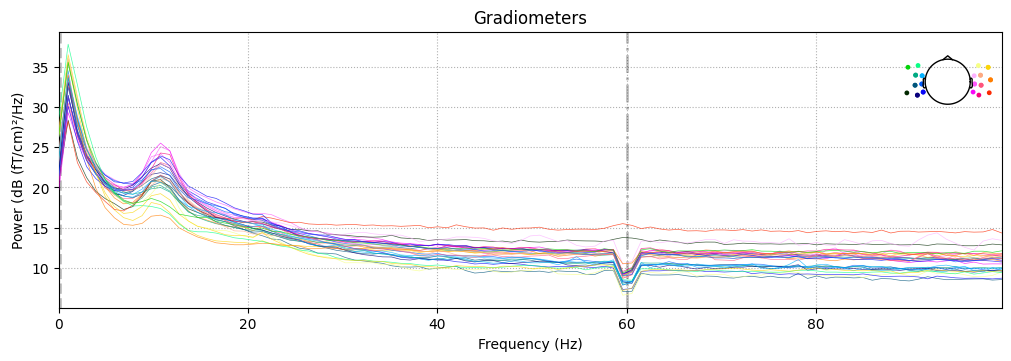

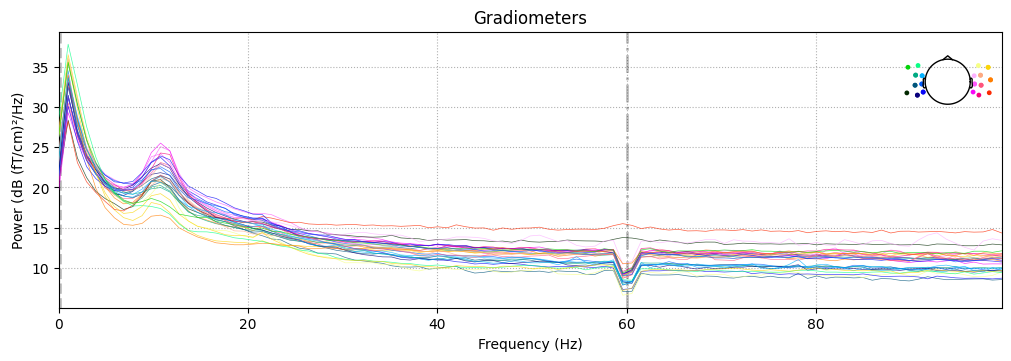

In [6]:
raw_M001.plot_psd(picks=stg_channels, fmax=100)


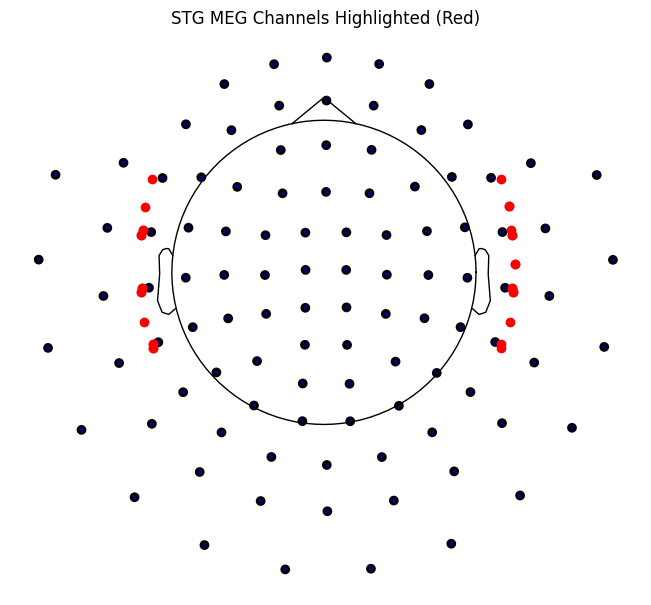

In [7]:
def plot_stg_sensor_topomap(raw, stg_channels):
    """
    Plots all MEG sensor positions and highlights STG-related ones in red.
    Works with all MNE versions (avoids private APIs).
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Base plot
    fig = raw.plot_sensors(kind='topomap', show=False)
    ax = fig.gca()

    # Get 2D positions using MNE layout
    layout = mne.channels.make_standard_montage('biosemi64')  # placeholder fallback
    try:
        layout = mne.channels.make_eeg_layout(raw.info)
    except Exception:
        pass

    # Manual fallback using loc[:2]
    for ch in raw.info['chs']:
        if ch['ch_name'] in stg_channels:
            loc = ch['loc'][:2]
            if np.all(np.isfinite(loc)):
                ax.plot(loc[0], loc[1], 'ro', markersize=6)

    plt.title("STG MEG Channels Highlighted (Red)")
    plt.show()






plot_stg_sensor_topomap(raw_M001, stg_channels)


🔍 Processing: Unfiltered
Used Annotations descriptions: [np.str_('hearing')]


<ipython-input-8-a34181f8ea26>:17: RuntimeWarning: Omitted 65 annotation(s) that were outside data range.
  proc_raw.set_annotations(annots)
<ipython-input-8-a34181f8ea26>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  proc_raw.set_annotations(annots)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).

🔍 Processing: Filtered (1-40Hz)
Used Annotations descriptions: [np.str_('hearing')]


<ipython-input-8-a34181f8ea26>:17: RuntimeWarning: Omitted 65 annotation(s) that were outside data range.
  proc_raw.set_annotations(annots)
<ipython-input-8-a34181f8ea26>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  proc_raw.set_annotations(annots)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


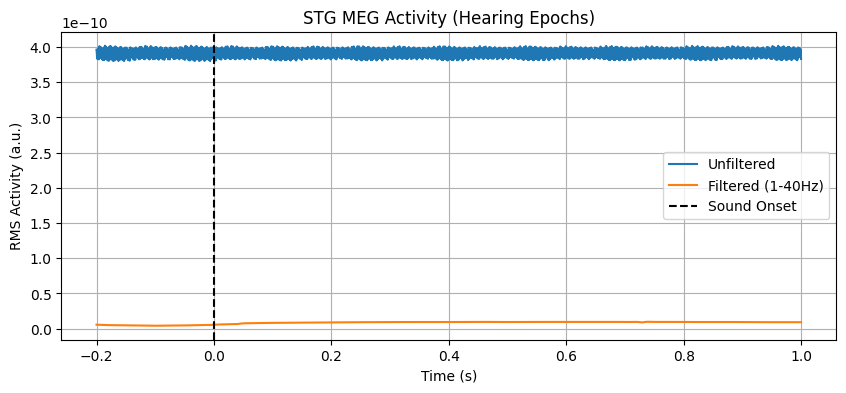

In [8]:
def compare_hearing_vs_silent_with_options(raw, df, stg_channels=None, pre=0.2, post=1.0):
    results = {}

    for filtered in [False, True]:
        label = "Filtered (1-40Hz)" if filtered else "Unfiltered"
        print(f"\n🔍 Processing: {label}")

        proc_raw = raw.copy()
        if filtered:
            proc_raw.filter(1., 40., fir_design='firwin', skip_by_annotation='edge', verbose=False)

        onsets = df['sound_1.started'].dropna().values
        durations = [post] * len(onsets)
        descs = ['hearing'] * len(onsets)

        annots = mne.Annotations(onset=onsets, duration=durations, description=descs)
        proc_raw.set_annotations(annots)

        try:
            events, event_id = mne.events_from_annotations(proc_raw, event_id={'hearing': 1})
        except ValueError:
            print("❌ No hearing events found.")
            continue

        epochs = mne.Epochs(proc_raw, events, event_id=event_id,
                            tmin=-pre, tmax=post, baseline=(-0.2, 0.0),
                            preload=True, reject_by_annotation=True, verbose=False)

        if stg_channels:
            epochs.pick_channels(stg_channels)
        else:
            epochs.pick_types(meg=True)

        epochs.drop_bad()  # Ensures len() works

        # Compute RMS
        data = epochs.get_data()
        rms_per_epoch = np.sqrt(np.square(data).mean(axis=1))
        avg_rms = rms_per_epoch.mean(axis=0)

        results[label] = {
            "times": epochs.times,
            "avg_rms": avg_rms,
            "epochs": epochs,
        }


    # Plot
    plt.figure(figsize=(10, 4))
    for label, data in results.items():
        plt.plot(data["times"], data["avg_rms"], label=label)

    plt.axvline(0, linestyle='--', color='black', label='Sound Onset')
    plt.xlabel("Time (s)")
    plt.ylabel("RMS Activity (a.u.)")
    plt.title("STG MEG Activity (Hearing Epochs)")
    plt.legend()
    plt.grid()
    plt.show()

    return results


results = compare_hearing_vs_silent_with_options(raw_M001, csv_data["M001"], stg_channels)


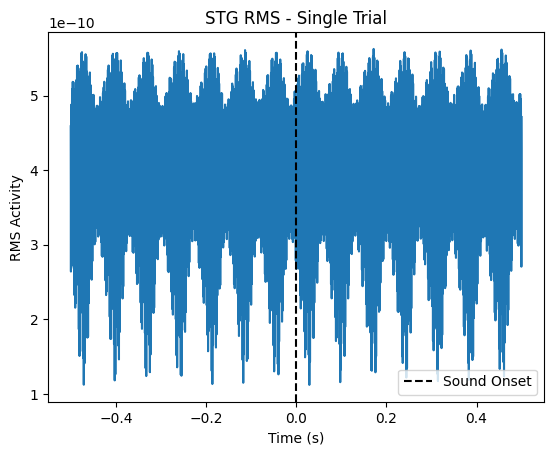

In [9]:
import matplotlib.pyplot as plt

# Extract epochs manually for one trial
t0 = df['sound_1.started'].dropna().values[0]
tmin, tmax = -.5, .5
sfreq = raw_M001.info['sfreq']
start = int((t0 + tmin) * sfreq)
stop = int((t0 + tmax) * sfreq)
data, _ = raw_M001.get_data(picks=stg_channels, start=start, stop=stop, return_times=True)

# Plot RMS of one trial
rms = np.sqrt(np.mean(data**2, axis=0))
plt.plot(np.linspace(tmin, tmax, len(rms)), rms)
plt.axvline(0, linestyle='--', color='black', label="Sound Onset")
plt.title("STG RMS - Single Trial")
plt.xlabel("Time (s)")
plt.ylabel("RMS Activity")
plt.legend()
plt.show()


📊 Mean RMS before: 3.91e-10
📊 Mean RMS after:  3.91e-10
🧪 Paired t-test: t = 2.269, p = 0.0235


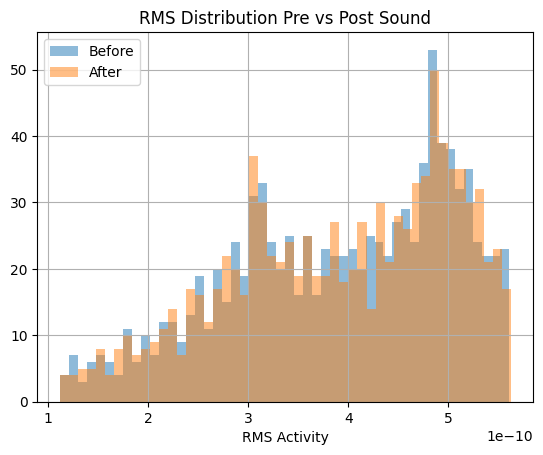

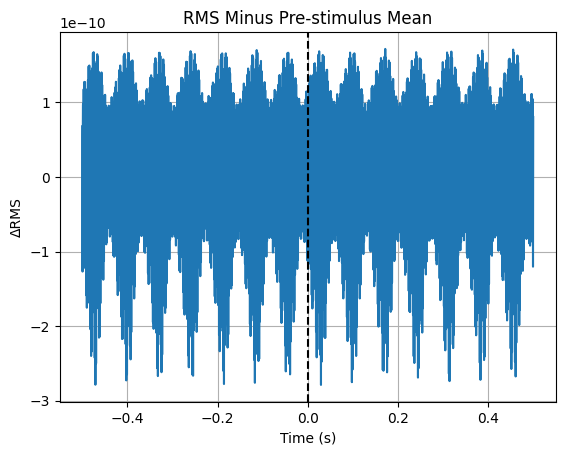

In [10]:
pre_window = (-1.5, 0.0)   # 1s before onset
post_window = (0.0, 1.5)   # 1s after onset
times = np.linspace(tmin, tmax, len(rms))
pre_mask = (times >= pre_window[0]) & (times < pre_window[1])
post_mask = (times >= post_window[0]) & (times < post_window[1])

pre_rms = rms[pre_mask]
post_rms = rms[post_mask]
import numpy as np
from scipy.stats import ttest_rel

pre_mean = np.mean(pre_rms)
post_mean = np.mean(post_rms)

print(f"📊 Mean RMS before: {pre_mean:.2e}")
print(f"📊 Mean RMS after:  {post_mean:.2e}")

# Paired t-test
t_stat, p_val = ttest_rel(post_rms, pre_rms)
print(f"🧪 Paired t-test: t = {t_stat:.3f}, p = {p_val:.3g}")

import matplotlib.pyplot as plt

plt.hist(pre_rms, bins=50, alpha=0.5, label="Before")
plt.hist(post_rms, bins=50, alpha=0.5, label="After")
plt.legend()
plt.xlabel("RMS Activity")
plt.title("RMS Distribution Pre vs Post Sound")
plt.grid(True)
plt.show()
plt.plot(times, rms - np.mean(pre_rms))
plt.axvline(0, color='black', linestyle='--')
plt.title("RMS Minus Pre-stimulus Mean")
plt.xlabel("Time (s)")
plt.ylabel("ΔRMS")
plt.grid(True)
plt.show()



In [12]:
#print("Filtered RMS max:", results["Filtered (1-40Hz)"][1].max())
#print("Unfiltered RMS max:", results["Unfiltered"][1].max())
#print("Epoch count (filtered):", len(results["Filtered (1-40Hz)"][1]))
#print("Epoch count (unfiltered):", len(results["Unfiltered"][1]))
#print("Channels in STG list (first 5):", stg_channels[:5])
#print("Matching channels in raw:", [ch for ch in stg_channels if ch in raw_M001.info['ch_names']])



In [13]:
print(raw_M001.annotations)
print(set(raw_M001.annotations.description))


<Annotations | 14 segments: BAD boundary (7), EDGE boundary (7)>
{np.str_('BAD boundary'), np.str_('EDGE boundary')}


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


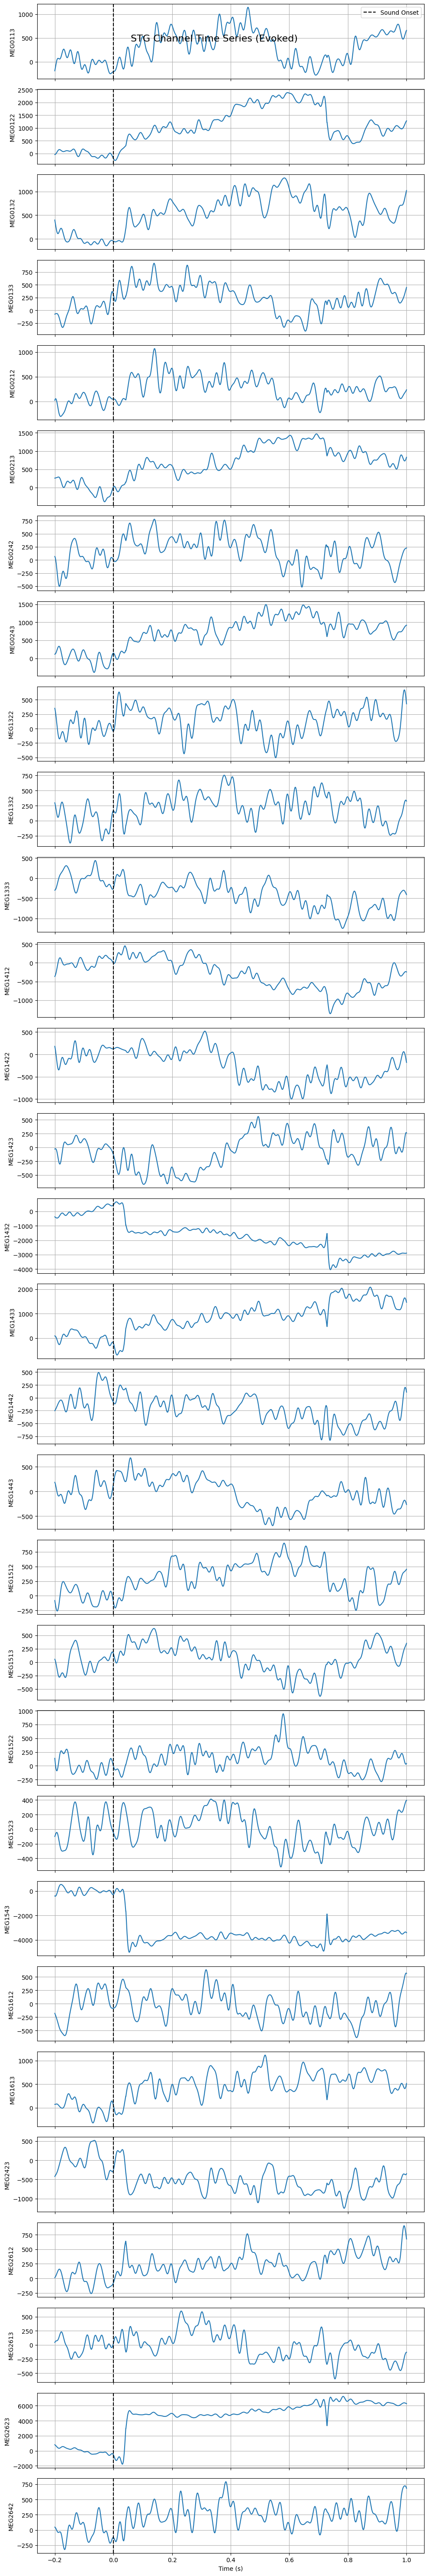

Projections have already been applied. Setting proj attribute to True.


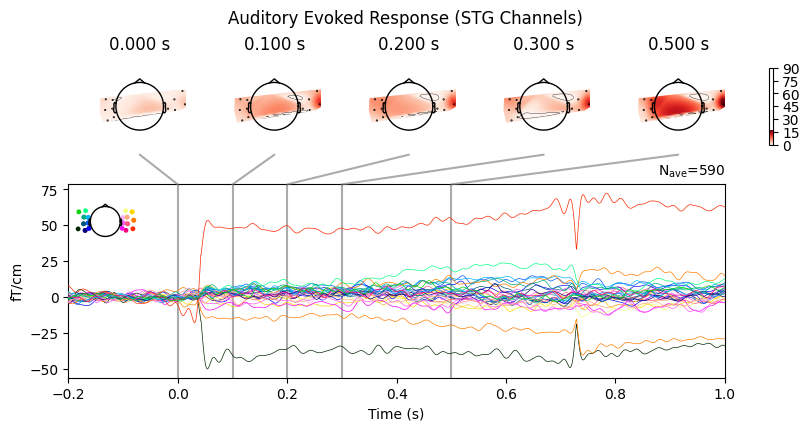

Projections have already been applied. Setting proj attribute to True.


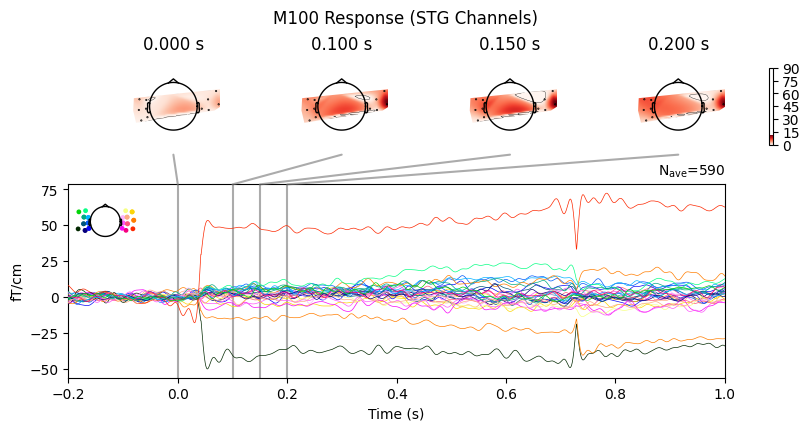

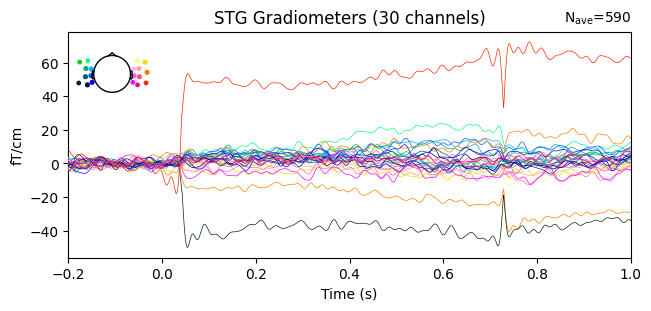

⚡ M100 Peak at: 0.130 s
Projections have already been applied. Setting proj attribute to True.


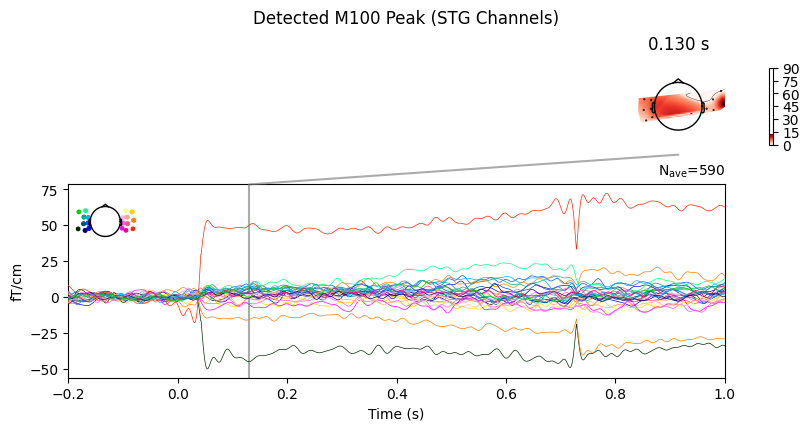

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Need more than one channel to make topography for grad. Disabling interactivity.


<ipython-input-14-63d4c8058dd3>:54: RuntimeWarning: Omitted 65 annotation(s) that were outside data range.
  raw_M001.set_annotations(annotations)
<ipython-input-14-63d4c8058dd3>:54: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_M001.set_annotations(annotations)


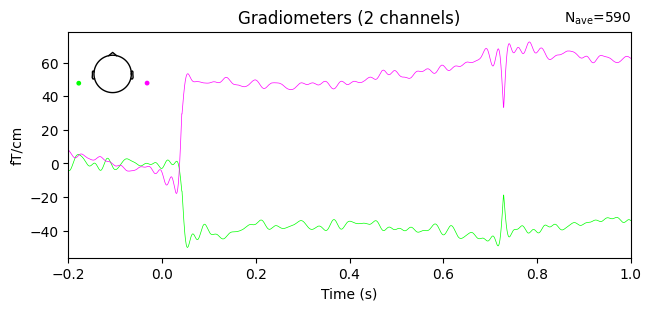

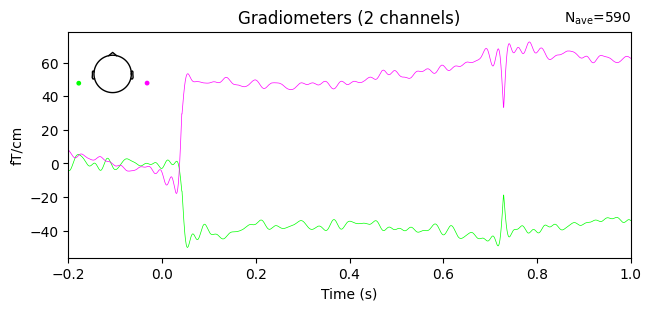

In [14]:

def analyze_auditory_evoked_response(epochs, stg_channels, times_for_plot=None):
    """
    Plot auditory evoked response from STG channels using precomputed filtered epochs.
    """
    evoked = epochs.copy().pick_channels(stg_channels).average()

    # Plot each STG channel separately
    times = evoked.times
    stg_data = evoked.data * 1e15  # fT

    fig, axes = plt.subplots(len(stg_channels), 1, figsize=(10, 2 * len(stg_channels)), sharex=True)
    fig.suptitle("STG Channel Time Series (Evoked)", fontsize=16)

    for i, ch in enumerate(stg_channels):
        axes[i].plot(times, stg_data[i])
        axes[i].axvline(0, linestyle='--', color='black', label='Sound Onset' if i == 0 else "")
        axes[i].set_ylabel(ch)
        axes[i].grid(True)
        if i == 0:
            axes[i].legend()

    axes[-1].set_xlabel("Time (s)")
    plt.tight_layout()
    plt.show()

    # Joint plots
    if times_for_plot is None:
        times_for_plot = [0.0, 0.1, 0.2, 0.3, 0.5]

    evoked.plot_joint(title="Auditory Evoked Response (STG Channels)", times=times_for_plot)
    evoked.plot_joint(times=[0.0, 0.1, 0.15, 0.2], title="M100 Response (STG Channels)")
    evoked.plot(picks='grad', spatial_colors=True, titles='STG Gradiometers', time_unit='s')

    # Detect peak in M100 window
    peak_time = evoked.get_peak(tmin=0.07, tmax=0.13, mode='abs')[1]
    print(f"⚡ M100 Peak at: {peak_time:.3f} s")

    evoked.plot_joint(times=[peak_time], title="Detected M100 Peak (STG Channels)")
    evoked.get_peak(tmin=0.07, tmax=0.13, mode='neg')


    return evoked

filtered_epochs = results["Filtered (1-40Hz)"]["epochs"]
evoked = analyze_auditory_evoked_response(filtered_epochs, stg_channels)

df_M001 = csv_data['M001']

onsets = df_M001['sound_1.started'].dropna().values
durations = [1.0] * len(onsets)
descriptions = ['hearing'] * len(onsets)

annotations = mne.Annotations(onset=onsets, duration=durations, description=descriptions)
raw_M001.set_annotations(annotations)


evoked.copy().pick_channels(['MEG1543', 'MEG2623']).plot(spatial_colors=True, time_unit='s')




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

def extract_epoch_features(raw, df, channels, tmin=-0.2, tmax=0.6):
    raw = raw.copy()
    raw.info['projs'] = []  # <--- DISABLE PROJECTIONS COMPLETELY

    onsets = df['sound_1.started'].dropna().values
    raw_start = raw.times[0]
    raw_end = raw.times[-1]
    buffer = 0.1
    safe_onsets = [o for o in onsets if raw_start + tmin + buffer < o < raw_end - tmax - buffer]

    durations = [tmax - tmin] * len(safe_onsets)
    desc = ['hearing'] * len(safe_onsets)
    raw.set_annotations(mne.Annotations(safe_onsets, durations, desc))

    events, event_id = mne.events_from_annotations(raw, event_id={'hearing': 1})
    epochs = mne.Epochs(
        raw, events, event_id=event_id,
        tmin=tmin, tmax=tmax,
        baseline=(tmin, 0),
        picks=channels,
        preload=True,
        proj=False  # Still good practice
    )

    return epochs.get_data().reshape(len(epochs), -1)



# --- Extract training data from M001 ---
X_train = extract_epoch_features(raw_M001, csv_data["M001"], ['MEG1543', 'MEG2623'])
y_train = np.ones(X_train.shape[0])  # All hearing trials

# --- Generate silent (non-hearing) trials for negative class ---
# Pick random times without sounds
np.random.seed(42)
silent_onsets = np.random.uniform(low=5.0, high=raw_M001.times[-1]-1.0, size=len(y_train))
silent_df = pd.DataFrame({'sound_1.started': silent_onsets})
X_silent = extract_epoch_features(raw_M001, silent_df, ['MEG1543', 'MEG2623'])
y_silent = np.zeros(X_silent.shape[0])  # Label 0 for silence

# --- Combine and train ---
X_total = np.vstack([X_train, X_silent])
y_total = np.concatenate([y_train, y_silent])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_total)

clf = LogisticRegression()
clf.fit(X_scaled, y_total)

# --- Apply to M002 ---
X_test = extract_epoch_features(raw_M002, csv_data["M002"], ['MEG1543', 'MEG2623'])
X_test_scaled = scaler.transform(X_test)
y_pred = clf.predict(X_test_scaled)

# --- Dummy true labels (all hearing) ---
y_true = np.ones(X_test.shape[0])

print(classification_report(y_true, y_pred, target_names=['Silent', 'Hearing']))


In [ ]:
# 1. Compute noise covariance from baseline
filtered_epochs = results["Filtered (1-40Hz)"]["epochs"]
noise_cov = mne.compute_covariance(filtered_epochs, tmin=-0.2, tmax=0.0, method='auto')


# 2. Load forward solution (already computed from BEM and coreg)
forward_path = os.path.join(subjects_dir, "fsaverage", "bem", "fsaverage-forward.fif")
forward = mne.read_forward_solution(forward_path)

# 3. Create inverse operator
inverse_operator = mne.minimum_norm.make_inverse_operator(
    raw_M001.info, forward, noise_cov, loose=0.2, depth=0.8)


snr = 3.0
lambda2 = 1.0 / snr**2

stc = mne.minimum_norm.apply_inverse(evoked, inverse_operator, lambda2=lambda2, method='dSPM')





In [ ]:
from mne.minimum_norm import apply_inverse

# Assume evoked, inverse_operator, lambda2, subjects_dir already defined

# 1. Apply inverse using all MEG channels (do NOT pick subset)
stc = apply_inverse(
    evoked,
    inverse_operator,
    lambda2=lambda2,
    method='dSPM'
)

# 2. Plot source activation at 100 ms using the full brain
stc.plot(
    subject='fsaverage',
    subjects_dir=subjects_dir,
    initial_time=0.1,
    time_unit='s',
    hemi='rh',         # 'lh' for left hemisphere, 'rh' for right, 'split' or 'both' also possible
    views='lat',       # 'lat' for lateral view
    backend='matplotlib'  # Use matplotlib for Colab-safe rendering
)


In [ ]:
from mne.minimum_norm import apply_inverse

evoked_subset = evoked.copy().pick(['MEG1543', 'MEG2623'])  # use inst.pick() not pick_channels
stc = apply_inverse(evoked_subset, inverse_operator, lambda2=lambda2, method='dSPM')

brain = stc.plot(
    subject='fsaverage',
    subjects_dir=subjects_dir,
    initial_time=0.1,
    time_unit='s',
    hemi='lh',  # or 'both'
    views='lat',
    backend='pyvistaqt'  # use 'auto' or omit if unsure
)




In [ ]:
# Get the average evoked data from selected channels
evoked_data = evoked.data  # shape: (n_channels, n_times)

# Find the global minimum value and its time
min_val = evoked_data.min()
min_idx = evoked_data.argmin()
min_ch, min_time_idx = np.unravel_index(min_idx, evoked_data.shape)
min_time = evoked.times[min_time_idx]
min_channel = evoked.ch_names[min_ch]

print(f"🔻 Global Minimum: {min_val:.2f} fT/cm at {min_time:.3f} s in channel {min_channel}")


In [ ]:
# --- Baseline correct (use same evoked object, assume tmin = -0.2s)
evoked = evoked.copy().apply_baseline(baseline=(-0.2, 0.0))  # Baseline correction
evoked = evoked.copy().filter(1., 40., fir_design='firwin')  # Bandpass filter

# --- Now average over channels
mean_waveform = evoked.data.mean(axis=0)
times = evoked.times

# --- Find minimum between 70-130 ms
m100_window = (times >= 0.07) & (times <= 0.13)
m100_time = times[m100_window][mean_waveform[m100_window].argmin()]
m100_amp = mean_waveform[m100_window].min()

# --- Plot
plt.figure(figsize=(8,4))
plt.plot(times, mean_waveform * 1e13, label='Avg STG Gradiometers')  # fT/cm
plt.axvline(m100_time, color='red', linestyle='--', label=f"M100: {m100_time*1000:.1f} ms")
plt.axvline(0, color='black', linestyle=':')
plt.xlabel("Time (s)")
plt.ylabel("Field (fT/cm)")
plt.title("Average Evoked Response (STG Channels)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
def print_sample_meg_values(raw, df, n_samples=3, duration_sec=0.2):
    # Pick only MEG channels
    picks = mne.pick_types(raw.info, meg=True)

    sfreq = raw.info['sfreq']
    duration = int(duration_sec * sfreq)

    print("\n🎧 Sample HEARING segments (MEG only):")
    hearing_trials = df[df['sound_1.started'] > 0].sample(n=n_samples)
    for i, row in hearing_trials.iterrows():
        start = int(row['sound_1.started'] * sfreq)
        stop = start + duration
        segment, _ = raw[picks, start:stop]
        print(f"Trial {i} - shape: {segment.shape}, values:\n{segment[:, :5]}")
        print("  Max value:", np.max(segment) if segment.size > 0 else "N/A")

    print("\n🤫 Sample SILENT segments (MEG only):")
    for i, row in hearing_trials.iterrows():
        start = int((row['sound_1.started'] - 0.5) * sfreq)
        if start < 0:
            continue
        stop = start + duration
        segment, _ = raw[picks, start:stop]
        print(f"Trial {i} - shape: {segment.shape}, values:\n{segment[:, :5]}")
        print("  Max value:", np.max(segment) if segment.size > 0 else "N/A")
        print("  Avg value:", np.mean(segment) if segment.size > 0 else "N/A")
        print(f"  Onset={row['sound_1.started']}, start={start}, stop={stop}, raw.n_times={raw.n_times}")





In [ ]:
def compute_segment_averages(raw, df, duration_sec=0.2):
    picks = mne.pick_types(raw.info, meg=True)
    sfreq = raw.info['sfreq']
    duration = int(duration_sec * sfreq)

    hearing_segments = []
    silent_segments = []

    for _, row in df[df['sound_1.started'] > 0].iterrows():
        # Hearing segment
        start = int(row['sound_1.started'] * sfreq)
        stop = start + duration
        if stop <= raw.n_times:
            segment, _ = raw[picks, start:stop]
            hearing_segments.append(segment)

        # Silent segment
        silent_start = int((row['sound_1.started'] - 0.5) * sfreq)
        silent_stop = silent_start + duration
        if silent_start >= 0 and silent_stop <= raw.n_times:
            silent_segment, _ = raw[picks, silent_start:silent_stop]
            silent_segments.append(silent_segment)

    # Combine all segments into one array each
    hearing_all = np.concatenate(hearing_segments, axis=1) if hearing_segments else np.array([])
    silent_all = np.concatenate(silent_segments, axis=1) if silent_segments else np.array([])

    print("\n📊 Overall Averages:")
    print("  Hearing segments avg:", np.mean(hearing_all) if hearing_all.size > 0 else "N/A")
    print("  Silent segments avg:", np.mean(silent_all) if silent_all.size > 0 else "N/A")


In [ ]:
for pid in ['M001', 'M002', 'M003']:
    print(f"\n🔎 Participant {pid}")
    raw = load_meg_blocks(pid)
    df = csv_data[pid]
    compute_segment_averages(raw, df)
    print_sample_meg_values(raw, df)
    print("→ Running with ALL sensors")

    #compare_hearing_vs_silence(raw, df)

    # Optional: Use auditory (STG) subset
    try:
        stg_channels = get_stg_channels(raw, subjects_dir="/content/drive/MyDrive/fsaverage")
        print(f"→ Running with STG sensors ({len(stg_channels)})")
        compare_hearing_vs_silence(raw, df, channels=stg_channels)
    except:
        print("⚠️ Could not isolate STG sensors — skipping subset")

